# Spline interpolation, smooth splines and DSI in 1-D

In this notebook, we will investigate extensions to spline interpolation for smoothed representations, as well as a (simplified) version of a widely used geological modeling interpolation method: Discrete Smooth Interpolation (DSC).

This notebook is part of the class "Structural Geological Models".

(c) Florian Wellmann, CG3, 2023

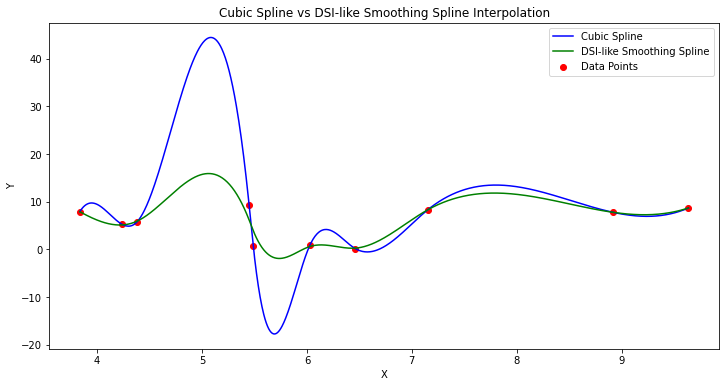

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, UnivariateSpline

# Generate random data points for demonstration
np.random.seed(0)  # For reproducibility
n = 10  # Number of data points
x = np.sort(np.random.rand(n) * 10)  # Random x-coordinates
y = np.random.rand(n) * 10  # Random y-coordinates

# Cubic Spline Interpolation
cubic_spline = interp1d(x, y, kind='cubic')

# DSI-like Smoothing Spline (using a smoothing factor)
smoothing_factor = 20  # This can be adjusted
smooth_spline = UnivariateSpline(x, y, s=smoothing_factor)

# Generate a range of x-values for plotting the interpolations
x_range = np.linspace(x.min(), x.max(), 1000)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x_range, cubic_spline(x_range), label='Cubic Spline', color='blue')
plt.plot(x_range, smooth_spline(x_range), label='DSI-like Smoothing Spline', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cubic Spline vs DSI-like Smoothing Spline Interpolation')
plt.legend()
plt.show()


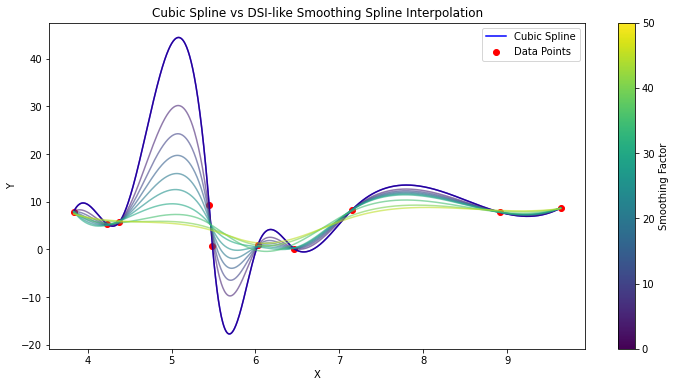

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d, UnivariateSpline

# Assuming x and y are defined as before
np.random.seed(0)  # For reproducibility
n = 10  # Number of data points
x = np.sort(np.random.rand(n) * 10)  # Random x-coordinates
y = np.random.rand(n) * 10  # Random y-coordinates
cubic_spline = interp1d(x, y, kind='cubic')
x_range = np.linspace(x.min(), x.max(), 1000)

# Define colormap
colormap = plt.cm.viridis  # You can change this to any other colormap like plt.cm.plasma
color_norm  = plt.Normalize(vmin=0, vmax=50)  # Adjust based on your range of smoothing factors
scalar_map = plt.cm.ScalarMappable(norm=color_norm, cmap=colormap)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x_range, cubic_spline(x_range), label='Cubic Spline', color='blue')

# Plotting DSI-like Smoothing Spline with varying smoothing factors
for i in np.arange(0, 50, 5):
    smoothing_factor = i
    smooth_spline = UnivariateSpline(x, y, s=smoothing_factor)
    color_val = scalar_map.to_rgba(smoothing_factor)
    plt.plot(x_range, smooth_spline(x_range), # label=f'smooth = {i}', 
             color=color_val, alpha=0.6)

# Adjusting the legend
scalar_map.set_array([])
cbar = plt.colorbar(scalar_map, orientation='vertical')
cbar.set_label('Smoothing Factor')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cubic Spline vs DSI-like Smoothing Spline Interpolation')
plt.legend()
plt.show()
